In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session (engine)

# Exploratory Precipitation Analysis

In [9]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2792326bf28>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x279232b4f60>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1}

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [13]:
one_year_ago = dt.date(2017,8,23)-dt.timedelta(days = 365)
one_year_ago

datetime.date(2016, 8, 23)

In [14]:

session.query(Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()


[('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08

In [15]:
stmt = session.query(Measurement).filter(Measurement.date >= '2016-08-23').statement
#     print(row)
prcp_one_year_df = pd.read_sql_query(stmt, session.bind)

prcp_one_year_df.set_index("date", inplace=True)

prcp_one_year_df.sort_values(["date"])
prcp_one_year_df.head(20)



,id,station,prcp,tobs
date,,,,
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-25,2366,USC00519397,0.08,80.0
2016-08-26,2367,USC00519397,0.00,79.0
2016-08-27,2368,USC00519397,0.00,77.0
2016-08-28,2369,USC00519397,0.01,78.0
2016-08-29,2370,USC00519397,0.00,78.0
2016-08-30,2371,USC00519397,0.00,79.0
2016-08-31,2372,USC00519397,0.13,80.0


In [22]:

group_month = prcp_one_year_df.groupby([(prcp_one_year_df.index.year), (prcp_one_year_df.index.month)]).mean()

group_month

AttributeError: 'Index' object has no attribute 'year'

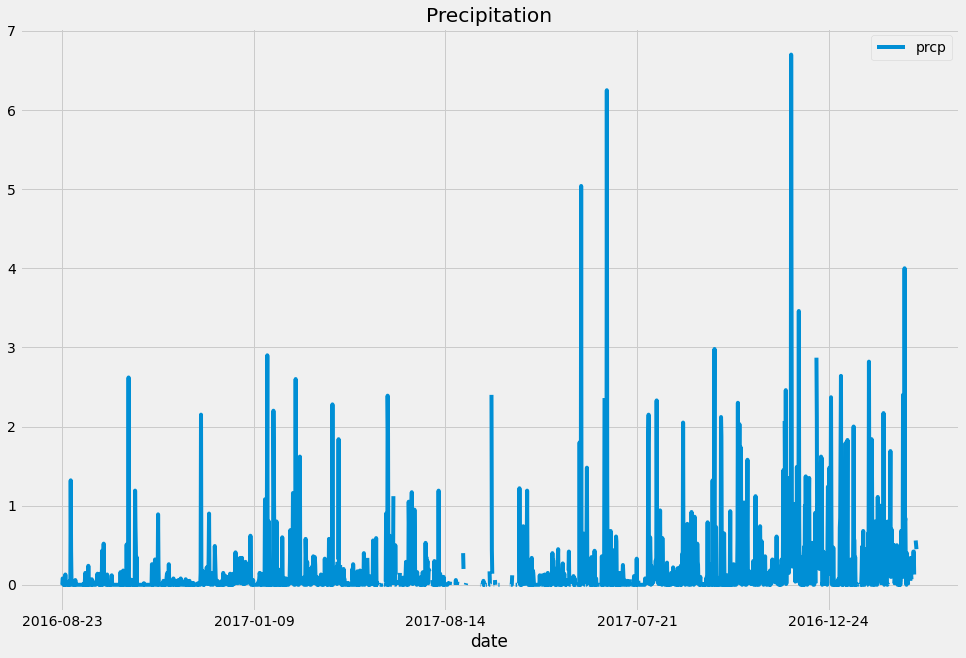

In [23]:

prcp_one_year_df.plot(y="prcp", title= "Precipitation", figsize=(15,10))

In [24]:
group_month["prcp"].plot(kind= "bar", title= "Precipitation avg")

NameError: name 'group_month' is not defined

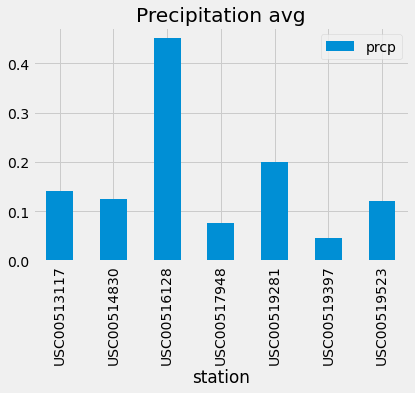

In [25]:
group_station = prcp_one_year_df.groupby(["station"]).mean()
group_station.head()

group_station.plot.bar(y="prcp", title= "Precipitation avg")

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_one_year_df.describe()

,id,prcp,tobs
count,2230.000000,2021.000000,2230.000000
mean,10158.570404,0.177279,74.590583
std,5603.500203,0.461190,4.611667
min,2364.000000,0.000000,58.000000
25%,5287.250000,0.000000,72.000000
50%,8930.500000,0.020000,75.000000
75%,14750.750000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
stations_unique = prcp_one_year_df.station.nunique()
stations_unique

Stations = session.query(Station)
print(Stations.count())

9


In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# group_station = prcp_one_year_df.groupby(["station"]).date.agg('count').sort_values(ascending = False)
# group_station
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = prcp_one_year_df.loc[prcp_one_year_df["station"] == "USC00519281"]
active_station
active_station.agg(["min", "max", "mean"])

measures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station =="USC00519281").all()
measures

[(54.0, 85.0, 71.66378066378067)]

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281")\
    .filter(Measurement.date >= '2016-08-23').all()
active_station
active_station_temp=pd.DataFrame(active_station, columns=["tobs"])
active_station_temp.describe()

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


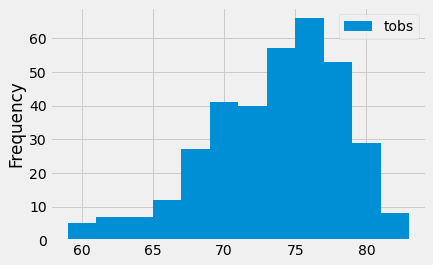

In [40]:
active_station_temp.plot.hist(bins=12)

# Close session

In [ ]:
# Close Session
session.close()